In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt


# Part 1

In [2]:
# Read JSON file into Pandas DataFrame

logins = pd.read_json('logins.json')

In [3]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [4]:
# Look at shape

logins.shape

(93142, 1)

In [5]:
# Look at data type and verify no null values exist

logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
login_time    93142 non-null datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [6]:
type(logins)

pandas.core.frame.DataFrame

In [7]:
for i in range(0,len(logins)):
    logins['count'] = 1

In [8]:
logins = logins.set_index('login_time')

In [9]:
logins.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 93142 entries, 1970-01-01 20:13:18 to 1970-04-13 18:54:23
Data columns (total 1 columns):
count    93142 non-null int64
dtypes: int64(1)
memory usage: 1.4 MB


In [10]:
agg_logins = logins.resample('15T').sum()

In [11]:
print(agg_logins.head())

                     count
login_time                
1970-01-01 20:00:00      2
1970-01-01 20:15:00      6
1970-01-01 20:30:00      9
1970-01-01 20:45:00      7
1970-01-01 21:00:00      1


In [12]:
agg_logins.describe()

,count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


In [13]:
ordered = agg_logins.sort_values('count')
print(ordered.head())
print(ordered.tail())

                     count
login_time                
1970-01-27 07:00:00      0
1970-02-11 06:45:00      0
1970-01-30 05:45:00      0
1970-01-30 06:30:00      0
1970-04-08 08:45:00      0
                     count
login_time                
1970-04-01 23:30:00     60
1970-04-04 01:15:00     63
1970-04-04 01:30:00     64
1970-04-04 05:30:00     66
1970-03-01 04:30:00     73


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014B31B429C8>]],
      dtype=object)

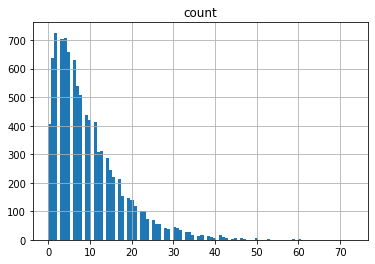

In [14]:
agg_logins.hist(bins=100)

In [15]:
# Look at monthly frequency

monthly_logins = logins.resample('M').sum()
print(monthly_logins)

            count
login_time       
1970-01-31  21239
1970-02-28  24673
1970-03-31  33723
1970-04-30  13507


In [16]:
# Best month was March, sharp drop in April
# Look at weekly frequency

weekly_logins = logins.resample('W').sum()
print(weekly_logins)

            count
login_time       
1970-01-04   2374
1970-01-11   5217
1970-01-18   5023
1970-01-25   4751
1970-02-01   4744
1970-02-08   5572
1970-02-15   5915
1970-02-22   7035
1970-03-01   6554
1970-03-08   7398
1970-03-15   7338
1970-03-22   8955
1970-03-29   7285
1970-04-05   8095
1970-04-12   6491
1970-04-19    395


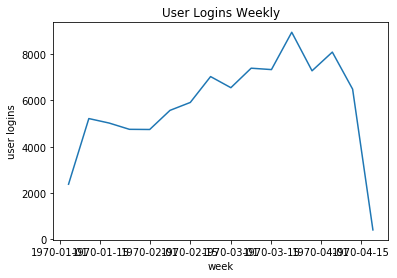

In [17]:
# Weekly frequency increased with time, best week was week beginning 1970-03-22, worst week was week beginning 1970-04-19
# Plot weekly frequency

plt.plot(weekly_logins)
plt.xlabel('week')
plt.ylabel('user logins')
plt.title('User Logins Weekly')
plt.show()

In [18]:
# Look at daily login trends

daily_logins = logins.resample('D').sum()
print(daily_logins)

            count
login_time       
1970-01-01    112
1970-01-02    681
1970-01-03    793
1970-01-04    788
1970-01-05    459
...           ...
1970-04-09    818
1970-04-10   1009
1970-04-11   1352
1970-04-12   1409
1970-04-13    395

[103 rows x 1 columns]


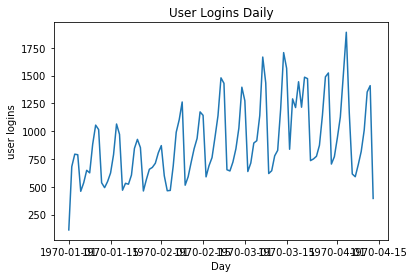

In [19]:
# Plot daily frequency

plt.plot(daily_logins)
plt.xlabel('Day')
plt.ylabel('user logins')
plt.title('User Logins Daily')
plt.show()

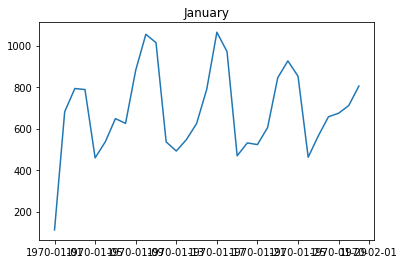

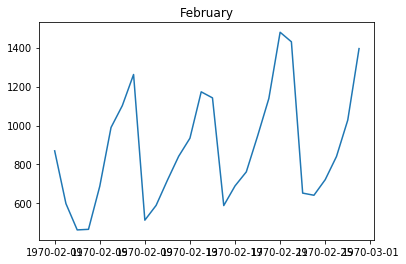

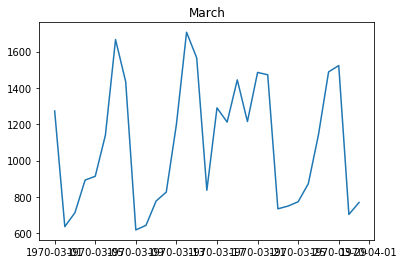

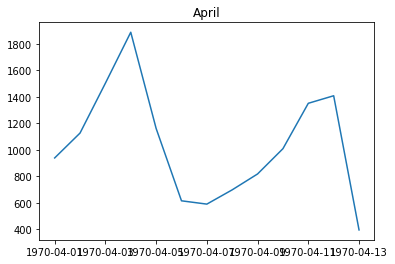

In [20]:
# There is a periodacity to the daily frequency data.
# Plot each Month in a single plot for better visibility


plt.plot(daily_logins[:'1970-01-31'])
plt.title('January')
plt.show()
plt.plot(daily_logins['1970-02-01':'1970-02-28'])
plt.title('February')
plt.show()
plt.plot(daily_logins['1970-03-01': '1970-03-31'])
plt.title('March')
plt.show()
plt.plot(daily_logins['1970-04-01':'1970-04-30'])
plt.title('April')
plt.show()

In [21]:
# Look at the last date a login occured

print(logins.tail(20))

                     count
login_time                
1970-04-13 17:52:11      1
1970-04-13 18:05:42      1
1970-04-13 18:09:57      1
1970-04-13 18:16:48      1
1970-04-13 18:18:26      1
1970-04-13 18:14:55      1
1970-04-13 18:12:34      1
1970-04-13 18:35:43      1
1970-04-13 18:36:55      1
1970-04-13 18:43:19      1
1970-04-13 18:36:53      1
1970-04-13 18:40:31      1
1970-04-13 18:46:06      1
1970-04-13 18:40:40      1
1970-04-13 18:48:52      1
1970-04-13 18:50:19      1
1970-04-13 18:43:56      1
1970-04-13 18:54:02      1
1970-04-13 18:57:38      1
1970-04-13 18:54:23      1


In [22]:
#  The last day a login occured was 1970-04-13, so the data is either incomplete or the web site broke after that date
#  There is incomplete data for April

In [23]:
weekday_logins = daily_logins
weekday_logins.head()

,count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


In [24]:
# Look at the days of the week with the heaviest web site traffic

weekday_logins = weekday_logins.reset_index(drop=False) #Drop the index so you can get a new column named `Date`. 
weekday_logins['day_of_week'] = weekday_logins['login_time'].dt.weekday_name #Create new column using pandas `dt.dayofweek`
print(weekday_logins.head())

  login_time  count day_of_week
0 1970-01-01    112    Thursday
1 1970-01-02    681      Friday
2 1970-01-03    793    Saturday
3 1970-01-04    788      Sunday
4 1970-01-05    459      Monday


In [25]:
print(weekday_logins.groupby('day_of_week').mean())

                   count
day_of_week             
Friday       1013.866667
Monday        588.200000
Saturday     1291.800000
Sunday       1211.133333
Thursday      797.333333
Tuesday       662.000000
Wednesday     738.500000


In [26]:
# The busiest days are Saturday, Sunday, and Friday
# Monday is the day with the least amount of web site log-ins
# Next look at hourly trends

hourly_logins = logins.resample('H').sum()
print(hourly_logins.head())

                     count
login_time                
1970-01-01 20:00:00     24
1970-01-01 21:00:00      9
1970-01-01 22:00:00     21
1970-01-01 23:00:00     58
1970-01-02 00:00:00     53


In [27]:
hourly_logins = hourly_logins.reset_index(drop=False)

In [28]:
print(hourly_logins.head())

           login_time  count
0 1970-01-01 20:00:00     24
1 1970-01-01 21:00:00      9
2 1970-01-01 22:00:00     21
3 1970-01-01 23:00:00     58
4 1970-01-02 00:00:00     53


In [29]:
hours = hourly_logins

In [30]:
hours['hour'] = hours['login_time'].dt.hour 
print(hours.head())

           login_time  count  hour
0 1970-01-01 20:00:00     24    20
1 1970-01-01 21:00:00      9    21
2 1970-01-01 22:00:00     21    22
3 1970-01-01 23:00:00     58    23
4 1970-01-02 00:00:00     53     0


In [31]:
hourly_means = hours.groupby('hour').mean()
print(hourly_means)

          count
hour           
0     58.754902
1     61.931373
2     56.862745
3     47.362745
4     49.352941
5     28.872549
6     11.156863
7      7.990196
8      8.019608
9     14.970588
10    30.039216
11    56.852941
12    48.666667
13    35.401961
14    33.588235
15    29.784314
16    27.764706
17    25.333333
18    29.215686
19    32.029703
20    40.225490
21    55.127451
22    64.774510
23    59.392157


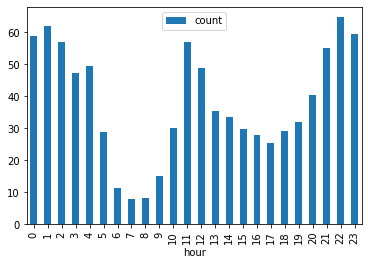

In [32]:
# busiest hours are 10pm, 1am
# plot histogram

hourly_means.plot(kind='bar')
plt.show()

In [33]:
# Busiest time for web site logins are early morning, late night, and mid-day

Conclusions:  Web site logins have increased over time from Jan to March, April data is incomplete, the busiest days for web site logins are weekends, the busiest hours for web site logins are early morning, mid-day, and late at night

# Part Two

1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


Based on the available data, I would use a pre and post reduction in surge percent for clients in Gotham and Metropolis as a key measure of success because it would indicate an improved availability of drivers in both cities.  If I had the option of including additional measurements in the dataset for measuring the success of this experiment I would want to look at pick up locations of the drivers in both cities to see if there was a more even distribution of pick up locations for drivers from both cities

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success.

a. how you will implement the experiment

I would measure the 30 day surge percent for riders from Gotham and Metropolis (independant of each other) prior to implementation of the experiment and compare it to the 30 day surge percent for both groups after implementation of the experiment.  I would look at both cities independently to make sure the effect occured in both cities.  

Null Hypothesis:  There will be no difference in the surge percent after implementation of the experiement for riders in either city

Alternative Hypothesis:  There will be a reduction in surge percent after implementation of the experiment for riders in one or both of the cities

Significance Level: The probability of rejecting the null hypothesis when it is true, (type 1 error). This will be set at 5% (0.05) which means that there is a 1 in 20 chance of rejecting the null hypothesis when it is true. 

Test Statistic: If p-value < 0.05 then there is evidence that the population mean ranks differ. Since the data is not likely to be normally distributed, I would report the difference of median for pre and post surge percent for each city

b. what statistical test(s) you will conduct to verify the significance of the
observation


Since the data is not likely to be normally distributed, I would use the Wilcox signed rank test.  The Wilcoxon signed rank test is used to compare two related samples, matched samples or repeated measurements on a single sample to assess whether their population mean ranks differ. It is a paired difference test and is the non-parametric alternative to the
paired t-test. The absolute differences are ranked then the signs of the actual differences used to add the negative and positive ranks.

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

I would plot a histogram of the differences and use a p-value < 0.05 to interpret the results.  My recommendations to the city operations team would be to based on if the experiment was effective on decreasing the surge percent.  I would also recommend more specific measures of diver availability in each city that related to drivers crossing the bridge, such as drivers originating in one city and having a pick up location in the other city during peak hours.  That would be a more directly relatable measure.  There are multiple reasons for why a surge percent would decrease over time that may not be due to drivers crossing the bridge.

# Part Three

In [34]:
#Import json file and convert to Pandas DataFrame

import json
with open('ultimate_data_challenge.json') as f:
   df = json.load(f)

df1 = pd.DataFrame(df)

In [35]:
print(df1.head())

             city  trips_in_first_30_days signup_date  avg_rating_of_driver  \
0  King's Landing                       4  2014-01-25                   4.7   
1         Astapor                       0  2014-01-29                   5.0   
2         Astapor                       3  2014-01-06                   4.3   
3  King's Landing                       9  2014-01-10                   4.6   
4      Winterfell                      14  2014-01-27                   4.4   

   avg_surge last_trip_date    phone  surge_pct  ultimate_black_user  \
0       1.10     2014-06-17   iPhone       15.4                 True   
1       1.00     2014-05-05  Android        0.0                False   
2       1.00     2014-01-07   iPhone        0.0                False   
3       1.14     2014-06-29   iPhone       20.0                 True   
4       1.19     2014-03-15  Android       11.8                False   

   weekday_pct  avg_dist  avg_rating_by_driver  
0         46.2      3.67                   

In [36]:
# Look at summary

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     49604 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [37]:
#Look at summary metrics for numerical values

df1.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [38]:
#Look at number of rows and features

df1.shape

(50000, 12)

In [39]:
df1.isnull()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,False,False,False,False,False,False,False,False,False,False,False,False
49996,False,False,False,True,False,False,False,False,False,False,False,False
49997,False,False,False,False,False,False,False,False,False,False,False,False
49998,False,False,False,False,False,False,False,False,False,False,False,False


In [40]:
print(df1['avg_rating_by_driver'].mean())
print(df1['avg_rating_by_driver'].median())

4.778158195947439
5.0


In [41]:
# Fill null values for avg_rating_by_driver and avg_rating_of_driver with mean of all values

df1['avg_rating_by_driver'] = df1['avg_rating_by_driver'].fillna(df1['avg_rating_by_driver'].mean())

In [42]:
df1['avg_rating_of_driver'] = df1['avg_rating_of_driver'].fillna(df1['avg_rating_of_driver'].mean())

In [43]:
# Fill null values of phone with "No Phone Given"

df1['phone'] = df1['phone'].fillna('No Phone Given')

In [44]:
# Make sure all null values are gone

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null object
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null object
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [45]:
df1.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.564977,0.222336,19.958811,37.081503,5.707357,0.445753
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.500000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.700000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [46]:
# Convert signup_date and last_trip_date to datetime datatype

df1['signup_date'] = pd.to_datetime(df1['signup_date'])
df1['last_trip_date'] = pd.to_datetime(df1['last_trip_date'])
df1['avg_dist'] = df1['avg_dist']/100.
df1['weekday_pct'] = df1['weekday_pct']/100.
df1['surge_pct'] = df1['surge_pct']/100.

In [47]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [48]:
df1['signup_to_last'] = df1['last_trip_date'] - df1['signup_date']

In [49]:
# Create retention after 30 days column - binary categorical column

df1['retained'] = 0

for i in range(0,len(df1['trips_in_first_30_days'])):
    if df1['trips_in_first_30_days'][i] > 0:
        df1['retained'][i] = 1

print(df1.retained.value_counts())
    

C:\Users\idptn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


1    34610
0    15390
Name: retained, dtype: int64


In [50]:
percent_retained = (df1.retained.sum()/len(df1.retained))*100
print(percent_retained)

69.22


In [51]:
# Create Target array for binary classification of retention after 6 mos

df1['mos6_retained'] = 0

for i in range(0,len(df1['signup_to_last'])):
    if df1['signup_to_last'][i] > pd.Timedelta('150 days'):
        df1['mos6_retained'][i] = 1

print(df1.mos6_retained.value_counts())

C:\Users\idptn\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


0    37802
1    12198
Name: mos6_retained, dtype: int64


In [52]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 15 columns):
city                      50000 non-null object
trips_in_first_30_days    50000 non-null int64
signup_date               50000 non-null datetime64[ns]
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
last_trip_date            50000 non-null datetime64[ns]
phone                     50000 non-null object
surge_pct                 50000 non-null float64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
signup_to_last            50000 non-null timedelta64[ns]
retained                  50000 non-null int64
mos6_retained             50000 non-null int64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(3), object(2), timedelta64[ns](1)
memory usage: 5.4+ MB


In [53]:
#One hot encode city

df2 = pd.get_dummies(df1, columns=['city', 'ultimate_black_user'], prefix='C')

In [54]:
# Create new dataframe that only contains columns for use in predictive model

model_df = df2.drop(columns=['signup_date', 'last_trip_date', 'phone', 'retained', 'signup_to_last'])

In [55]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
trips_in_first_30_days    50000 non-null int64
avg_rating_of_driver      50000 non-null float64
avg_surge                 50000 non-null float64
surge_pct                 50000 non-null float64
weekday_pct               50000 non-null float64
avg_dist                  50000 non-null float64
avg_rating_by_driver      50000 non-null float64
mos6_retained             50000 non-null int64
C_Astapor                 50000 non-null uint8
C_King's Landing          50000 non-null uint8
C_Winterfell              50000 non-null uint8
C_False                   50000 non-null uint8
C_True                    50000 non-null uint8
dtypes: float64(6), int64(2), uint8(5)
memory usage: 3.3 MB


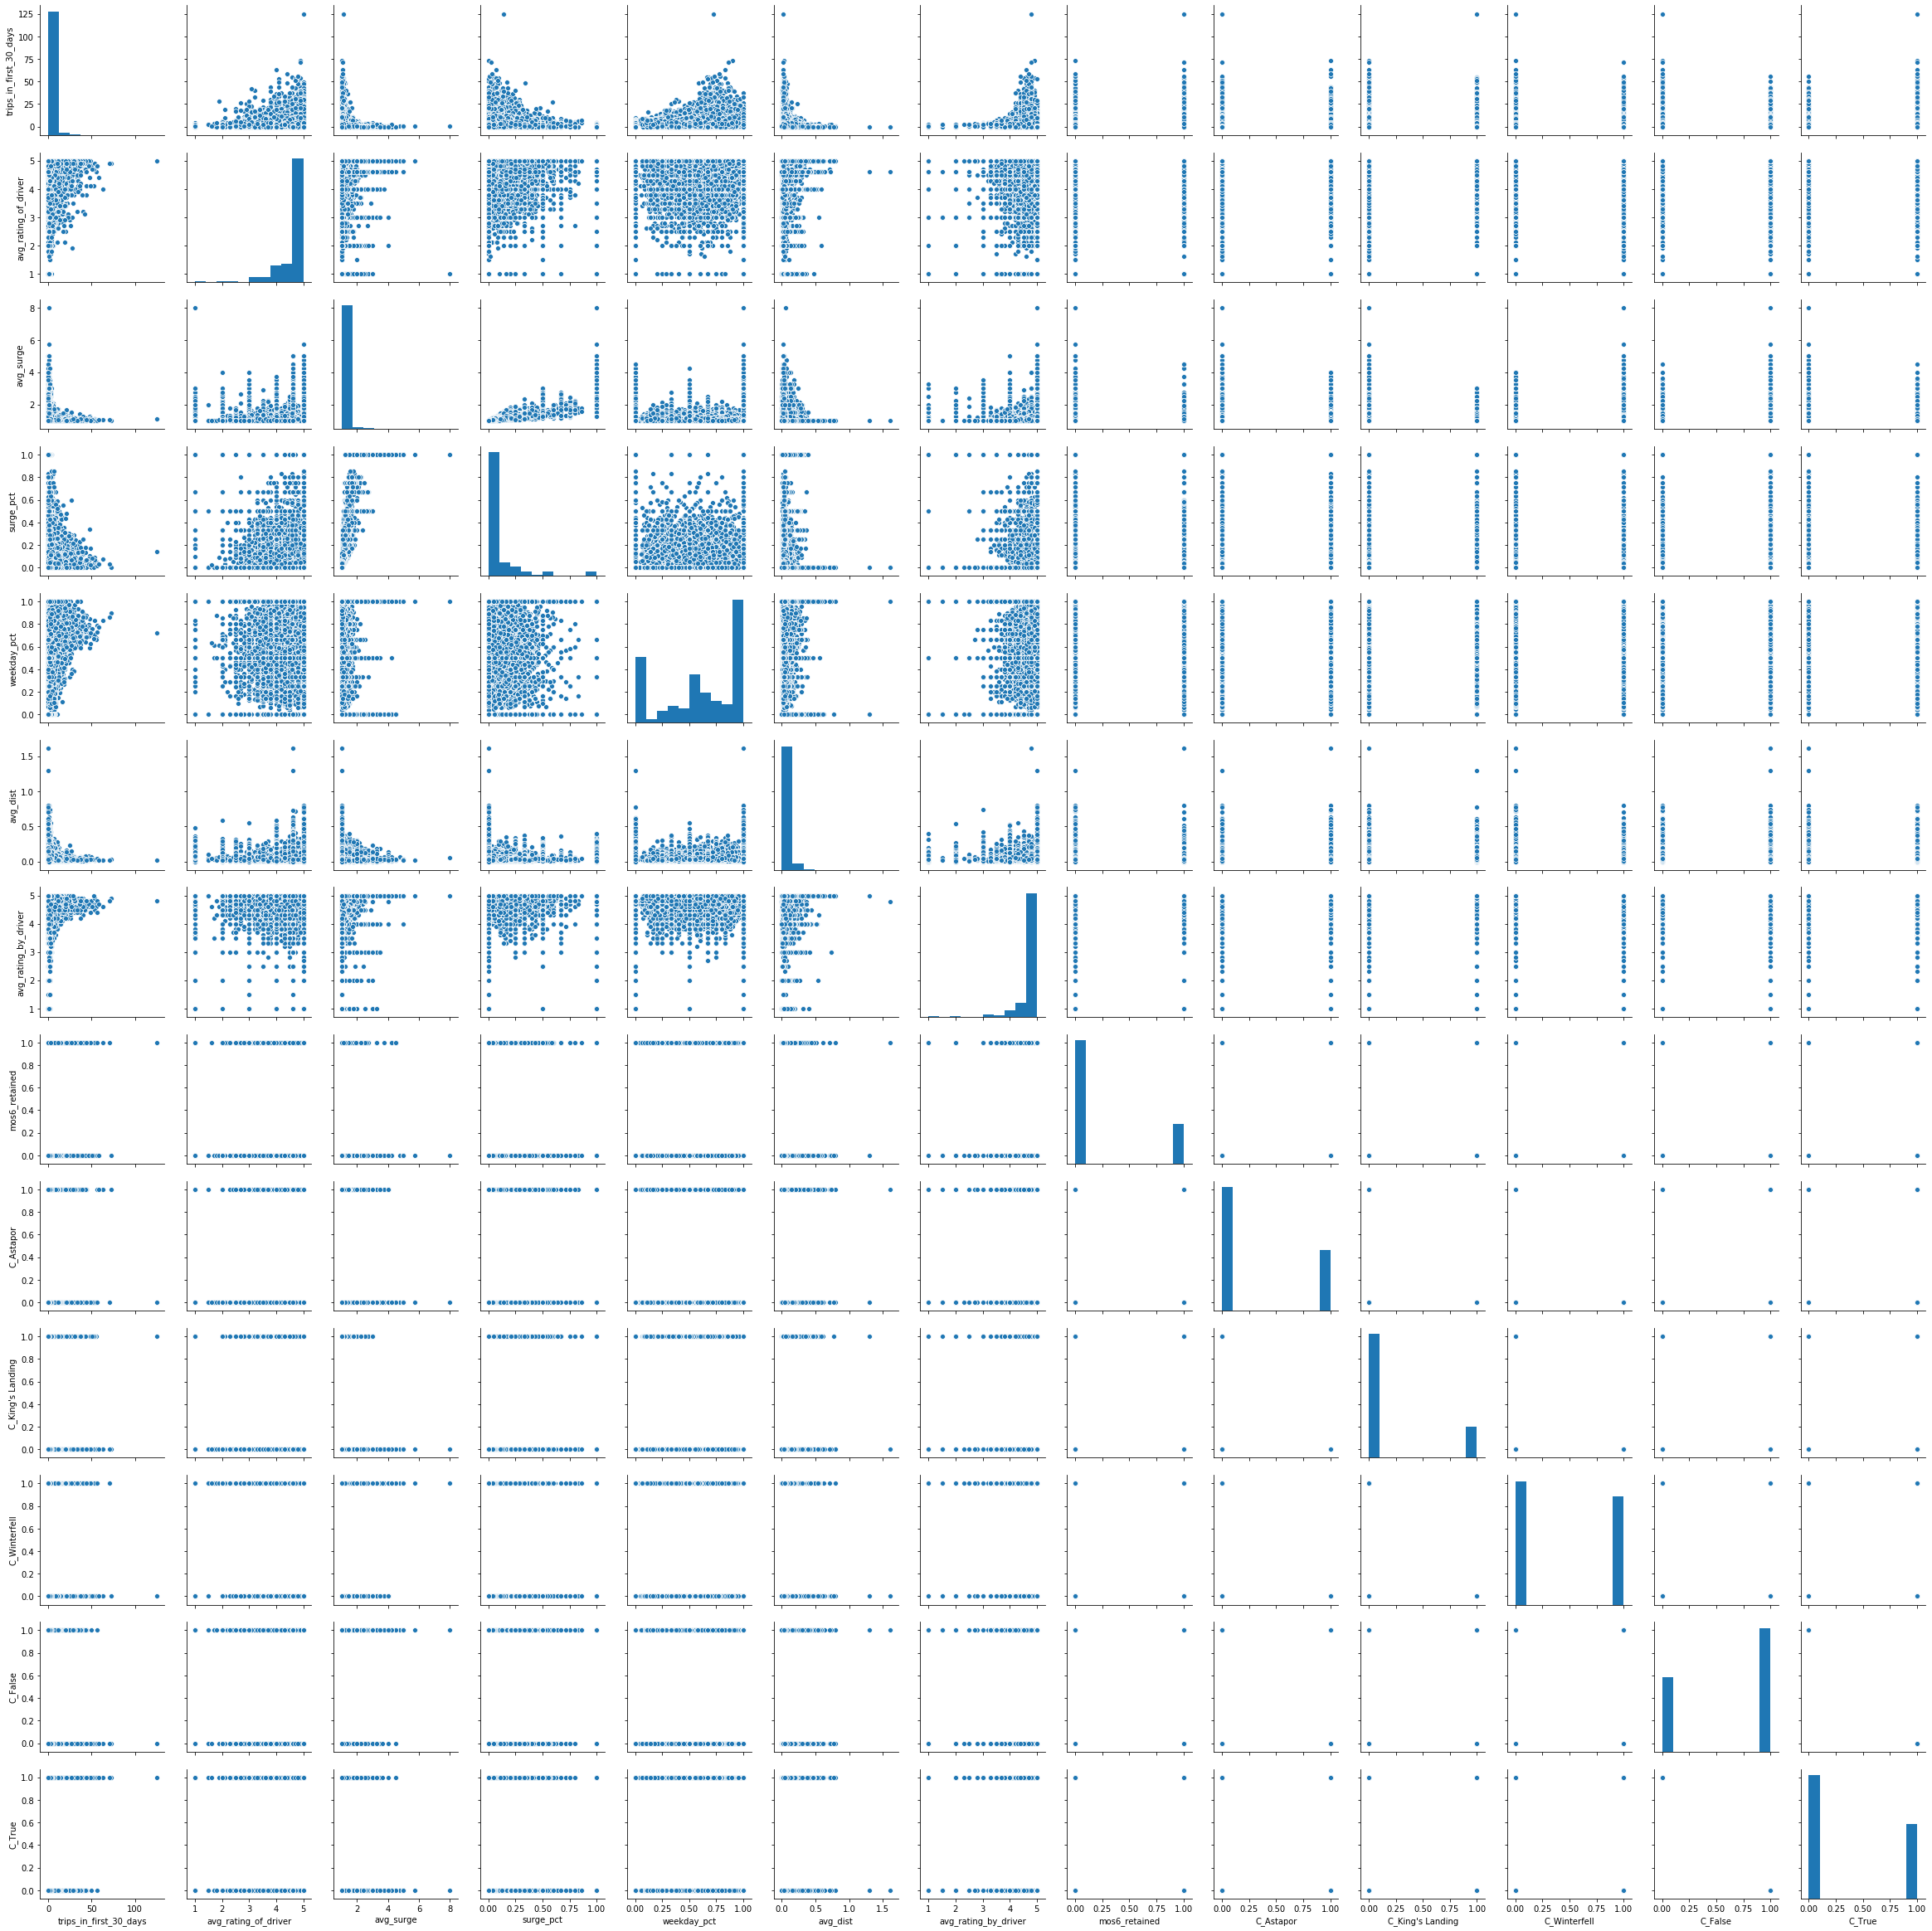

In [56]:
# Look at pairplot

import seaborn as sns

sns.pairplot(model_df)

In [57]:
# Prepare Data and Feature arrays

y = model_df['mos6_retained']
X = model_df.drop(columns=['mos6_retained'])

print(y.shape, X.shape)

(50000,) (50000, 12)


In [58]:
# Prepare training and testing splits

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, stratify=y)

In [59]:
# Build Classifier model

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier

# create lists of hyperparameters to search over
min_samples_leaf_list = list(range(1, 51))
criterion_list = ['gini', 'entropy',]
max_feature_list = ['auto', 'sqrt', 'log2', None ]
max_depth_list = list(range(3,56))

parameter_grid = {
    'min_samples_leaf': min_samples_leaf_list,
    'criterion': criterion_list,
    'max_features': max_feature_list,
    'max_depth': max_depth_list
    
}

number_of_models = 10

GB_model = RandomizedSearchCV(estimator=RandomForestClassifier(),
                             param_distributions = parameter_grid,
                             n_iter = number_of_models,
                             scoring = 'accuracy',
                             n_jobs = 4,
                             cv = 10,
                             refit=True,
                             return_train_score=True)

GB_model.fit(X_train, y_train)


C:\Users\idptn\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [60]:
print(GB_model.best_params_)
print(GB_model.best_score_)

{'min_samples_leaf': 34, 'max_features': None, 'max_depth': 24, 'criterion': 'entropy'}
0.7939466666666667


In [61]:
predictions = GB_model.best_estimator_.predict(X_test)
accuracy = GB_model.best_estimator_.score(X_test, y_test)
print(accuracy)

0.7872


In [62]:
feature_weights = GB_model.best_estimator_.feature_importances_
print(feature_weights)

[0.0585583  0.04169245 0.02117398 0.15261505 0.10268975 0.12315676
 0.31875089 0.0227245  0.10784094 0.00752526 0.01747915 0.02579297]


In [63]:
columns = X.columns
print(columns)

Index(['trips_in_first_30_days', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'weekday_pct', 'avg_dist', 'avg_rating_by_driver',
       'C_Astapor', 'C_King's Landing', 'C_Winterfell', 'C_False', 'C_True'],
      dtype='object')


In [64]:
importances = list(zip(columns, feature_weights))
print(importances)

[('trips_in_first_30_days', 0.05855830461181724), ('avg_rating_of_driver', 0.0416924482687359), ('avg_surge', 0.021173983419252106), ('surge_pct', 0.15261505499521943), ('weekday_pct', 0.10268974710944435), ('avg_dist', 0.1231567573524577), ('avg_rating_by_driver', 0.31875088854384315), ('C_Astapor', 0.022724496819916475), ("C_King's Landing", 0.10784094318779408), ('C_Winterfell', 0.007525257022877359), ('C_False', 0.017479153143834494), ('C_True', 0.025792965524807785)]


In [65]:
importances_df = pd.DataFrame(importances, columns=['feature', 'importance'])
print(importances_df)

                   feature  importance
0   trips_in_first_30_days    0.058558
1     avg_rating_of_driver    0.041692
2                avg_surge    0.021174
3                surge_pct    0.152615
4              weekday_pct    0.102690
5                 avg_dist    0.123157
6     avg_rating_by_driver    0.318751
7                C_Astapor    0.022724
8         C_King's Landing    0.107841
9             C_Winterfell    0.007525
10                 C_False    0.017479
11                  C_True    0.025793


In [66]:
# Most important feature was average rating by driver
# Second most important feature was surge_pct
# Third most important feature was avg_surge
# Fourth most important was weekday pct

# Recommendations:  Find out what the biggest deciding factors are for scoring a ride highly and focus on maximizing those
# ride attributes, increase driver availability during peak hours, maximize driver availability during peak hours on the
# weekdays